In [4]:
import pandas as pd
import numpy as np
import torch
from PIL import Image
import os

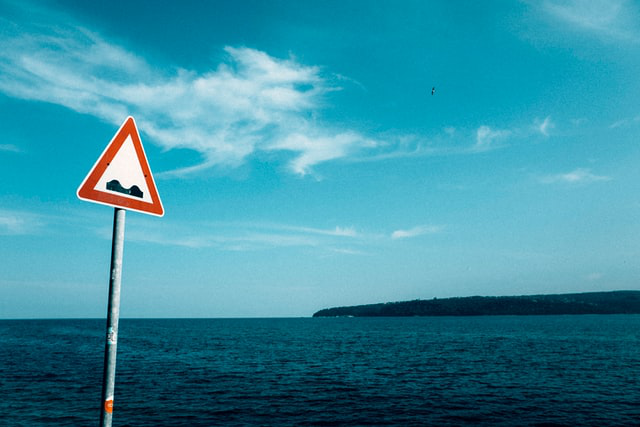

In [5]:
img = Image.open("images/alexander-stanishev-pk_1RdcAfbE-unsplash.jpg")
img

In [6]:
with open("classes.txt") as file:
    classnames = eval(file.read())

In [7]:
model = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_efficientnet_b0', pretrained=True)
type(model)

Using cache found in /Users/marekkadlcik/.cache/torch/hub/NVIDIA_DeepLearningExamples_torchhub
/Users/marekkadlcik/.cache/torch/hub/NVIDIA_DeepLearningExamples_torchhub/PyTorch/Classification/ConvNets/image_classification/models/common.py:13: UserWarning: pytorch_quantization module not found, quantization will not be available
  warnings.warn(
/Users/marekkadlcik/.cache/torch/hub/NVIDIA_DeepLearningExamples_torchhub/PyTorch/Classification/ConvNets/image_classification/models/efficientnet.py:17: UserWarning: pytorch_quantization module not found, quantization will not be available
  warnings.warn(


PyTorch.Classification.ConvNets.image_classification.models.efficientnet.EfficientNet

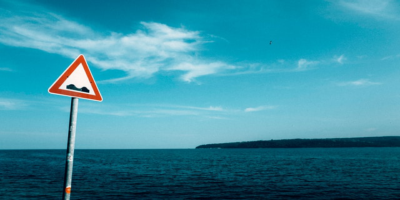

In [8]:
img_small = img.resize((400, 200), resample=Image.BILINEAR)
img_small

In [9]:
tensor = torch.tensor(np.asarray(img_small).transpose(2,0,1)).float().unsqueeze(0) / 255
tensor.requires_grad=True
tensor

tensor([[[[0.0000, 0.0039, 0.0078,  ..., 0.1529, 0.1412, 0.1373],
          [0.0000, 0.0000, 0.0039,  ..., 0.1725, 0.1608, 0.1569],
          [0.0000, 0.0000, 0.0039,  ..., 0.2078, 0.1961, 0.1843],
          ...,
          [0.0078, 0.0078, 0.0078,  ..., 0.0039, 0.0078, 0.0157],
          [0.0039, 0.0039, 0.0039,  ..., 0.0078, 0.0039, 0.0000],
          [0.0196, 0.0196, 0.0275,  ..., 0.0078, 0.0078, 0.0039]],

         [[0.5098, 0.5176, 0.5255,  ..., 0.6118, 0.6196, 0.6275],
          [0.5059, 0.5098, 0.5176,  ..., 0.6235, 0.6275, 0.6353],
          [0.5020, 0.5059, 0.5137,  ..., 0.6353, 0.6353, 0.6314],
          ...,
          [0.2078, 0.1882, 0.2039,  ..., 0.1647, 0.1490, 0.1451],
          [0.1725, 0.1686, 0.1765,  ..., 0.1020, 0.0902, 0.0745],
          [0.2039, 0.2078, 0.2118,  ..., 0.0471, 0.0314, 0.0196]],

         [[0.6196, 0.6275, 0.6353,  ..., 0.7098, 0.7098, 0.7176],
          [0.6157, 0.6235, 0.6275,  ..., 0.7176, 0.7216, 0.7255],
          [0.6157, 0.6196, 0.6235,  ..., 0

In [10]:
prediction = model.eval()(tensor)

cls = torch.argmax(prediction.detach().flatten()).item()
cls

919

In [11]:
loss_fn = torch.nn.CrossEntropyLoss()
target = torch.tensor([cls])
loss = loss_fn(prediction, target)
loss.backward()
tensor.grad

tensor([[[[-2.5908e-03, -2.2905e-03,  5.3016e-03,  ...,  5.9923e-04,
           -8.9707e-04,  3.0798e-04],
          [ 1.8092e-03,  2.4228e-03,  2.4707e-03,  ..., -2.1583e-03,
            2.3879e-04,  2.3832e-03],
          [ 4.3817e-03,  6.2918e-03,  5.1869e-03,  ..., -2.6417e-03,
           -1.5924e-03, -1.5526e-03],
          ...,
          [ 2.4189e-03, -1.5233e-03, -6.8465e-03,  ...,  1.0286e-02,
           -1.5678e-04, -2.9284e-03],
          [ 1.3984e-03, -2.6474e-03, -4.3010e-03,  ..., -3.8427e-03,
           -1.2150e-03,  2.0662e-03],
          [ 9.5825e-04, -2.9762e-03,  4.4350e-03,  ...,  7.4331e-04,
           -1.8909e-03,  2.4628e-03]],

         [[-6.5246e-03, -1.1785e-02, -1.4414e-04,  ..., -2.6320e-03,
           -6.8455e-03, -1.5099e-03],
          [ 1.9072e-03, -7.6459e-04, -4.7271e-03,  ..., -7.6585e-03,
           -4.1976e-03,  1.3179e-03],
          [ 5.7219e-03,  6.2651e-03,  3.1457e-03,  ..., -5.1937e-03,
           -4.9626e-03, -5.3702e-03],
          ...,
     

In [20]:
tensor.shape

torch.Size([1, 3, 200, 400])

In [13]:
tensor.grad.shape

torch.Size([1, 3, 200, 400])

In [14]:
explanation = tensor.detach() * tensor.grad.detach()

In [15]:

def img2tensor(img: Image) -> torch.Tensor:
    """
    Args:
        img: image to convert
    Returns:
        tensor of shape (1, 3, H, W)
            the first dimension (batch size) is neccesary for the CNN
            3 channels are for RGB (alpha channel is not supported)
            values are between 0 and 1
    Examples:
        >>> img = pillow.new('RGB', (16, 9), color=(0, 100, 255))
        >>> tensor = img2tensor(img)
        >>> tensor.shape
        torch.Size([1, 3, 9, 16])
        >>> torch.all((0 <= tensor) & (tensor <= 1))
        tensor(True)
    """
    arr = np.array(img).transpose(2, 0, 1)[np.newaxis, ...]
    return torch.tensor(arr).float() / 255


def tensor2img(tensor: torch.Tensor) -> Image:
    """
    Args:
        tensor: shape (1, 3, H, W),
                values are between 0 and 1
    Returns:
        pillow image of size (W, H)
    Examples:
        >>> x = torch.ones((1, 3, 9, 16))
        >>> torch.all((0 <= x) & (x <= 1))
        tensor(True)
        >>> tensor2img(x).size
        (16, 9)
    """
    tensor = tensor.squeeze(0) * 255
    arr = np.uint8(tensor.numpy()).transpose(1, 2, 0)
    return Image.fromarray(arr)


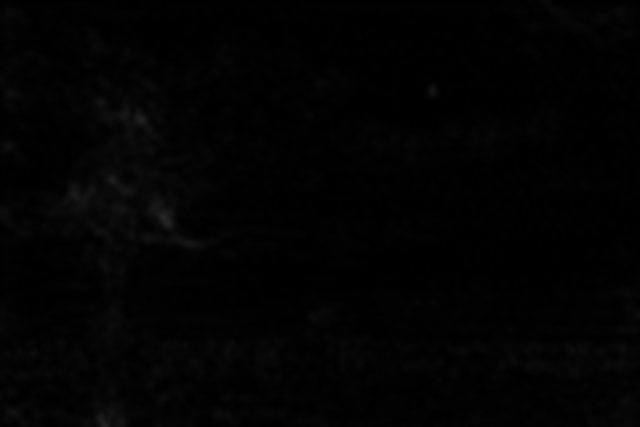

In [16]:
from PIL import ImageFilter

tensor2img((tensor.grad*5).clamp(0,1)).convert('L').resize(img.size).filter(ImageFilter.GaussianBlur(radius = 3))

In [22]:
%%timeit -n 10 
prediction = model(tensor)
target = torch.tensor([cls])
loss = loss_fn(prediction, target)
loss.backward()

807 ms ± 168 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [27]:
tensor2 = tensor.detach().repeat(3, 1, 1, 1)
tensor2.requires_grad = True

In [28]:
%%timeit -n 10 
prediction = model(tensor2)
target = torch.tensor([cls, cls-1, cls-2])
loss = loss_fn(prediction, target)
loss.backward()

919